In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem
import warnings
warnings.filterwarnings("ignore")


mouse_data = pd.read_csv("mouse_drug_data.csv")
clinical_data = pd.read_csv("clinicaltrial_data.csv")

Data_join_v1 = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID" )

Data_join_v2 = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID" )

Data_join_v2["Timepoint"] = Data_join_v2["Timepoint"].astype("object")

Data_join_reindex = Data_join_v1.set_index("Mouse ID")

left_data = pd.merge(clinical_data,mouse_data, how="left", on=["Mouse ID", "Mouse ID"])



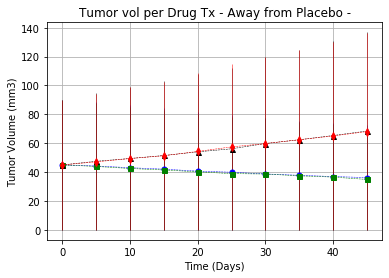

In [6]:


agrup_drug_time = left_data.groupby(["Drug", "Timepoint"])
mean_tumor = agrup_drug_time["Tumor Volume (mm3)"].mean()

mean_tumor_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mean_tumor})

mean_tumor_se = agrup_drug_time["Tumor Volume (mm3)"].sem()

mean_tumor_se_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mean_tumor_se})

mean_tumor_drug_time_df = mean_tumor_drug_time_df.reset_index()
mean_tumor_se_drug_time_df = mean_tumor_drug_time_df.reset_index()
munging_mean_tumor= pd.pivot_table(mean_tumor_drug_time_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
munging_se_mean_tumor= pd.pivot_table(mean_tumor_drug_time_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")

plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Capomulin"], 
             yerr=munging_se_mean_tumor["Capomulin"], color="b", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Ramicane"], 
             yerr=munging_se_mean_tumor["Ramicane"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Stelasyn"], 
             yerr=munging_se_mean_tumor["Stelasyn"], color="k", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Placebo"], 
             yerr=munging_se_mean_tumor["Placebo"], color="r", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor vol per Drug Tx - Away from Placebo -")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)

plt.savefig("task1_1.png")
plt.show()

## Tumor Response to Treatment

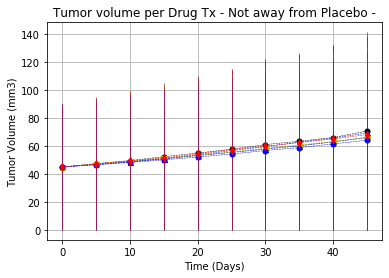

In [7]:
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Ketapril"], 
             yerr=munging_se_mean_tumor["Ketapril"], color="k", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Naftisol"], 
             yerr=munging_se_mean_tumor["Naftisol"], color="b", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Propriva"], 
             yerr=munging_se_mean_tumor["Propriva"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Zoniferol"], 
             yerr=munging_se_mean_tumor["Zoniferol"], color="b", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Infubinol"], 
             yerr=munging_se_mean_tumor["Infubinol"], color="y", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Ceftamin"], 
             yerr=munging_se_mean_tumor["Ceftamin"], color="b", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mean_tumor.index, munging_mean_tumor["Placebo"], 
             yerr=munging_se_mean_tumor["Placebo"], color="r", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor volume per Drug Tx - Not away from Placebo -")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)

plt.savefig("task1_2.png")
plt.show()

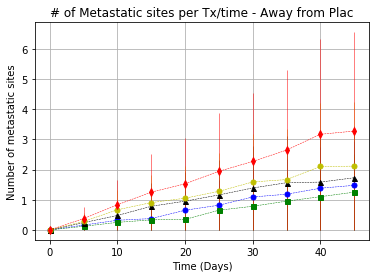

In [9]:
mestastic = agrup_drug_time["Metastatic Sites"].mean()

mestastic_by_drug_time = pd.DataFrame({"Mean Metastatic Sites" : mestastic})

mestastic_se = agrup_drug_time["Metastatic Sites"].sem()

mestastic_se_by_drug_time = pd.DataFrame({"Mean Metastatic Sites" : mestastic_se})


mestastic_by_drug_time = mestastic_by_drug_time.reset_index()
mestastic_se_by_drug_time = mestastic_by_drug_time.reset_index()

munging_metastic = pd.pivot_table(mestastic_by_drug_time,values="Mean Metastatic Sites", index="Timepoint", columns="Drug")
munging_se_metastic = pd.pivot_table(mestastic_se_by_drug_time,values="Mean Metastatic Sites", index="Timepoint", columns="Drug")



plt.errorbar(munging_metastic.index, munging_metastic["Capomulin"], 
             yerr=munging_se_metastic["Capomulin"], color="b", 
             marker="o", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Ramicane"], 
             yerr=munging_se_metastic["Ramicane"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Stelasyn"], 
             yerr=munging_se_metastic["Stelasyn"], color="k", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Infubinol"], 
             yerr=munging_se_metastic["Infubinol"], color="y", 
             marker="o", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Placebo"], 
             yerr=munging_se_metastic["Placebo"], color="r", 
             marker="d", markersize=5, linestyle="dashed", 
             linewidth=0.50)


plt.title("# of Metastatic sites per Tx/time - Away from Plac")
plt.ylabel("Number of metastatic sites")
plt.xlabel("Time (Days)")
plt.grid(True)


plt.savefig("task2_1.png")


plt.show()

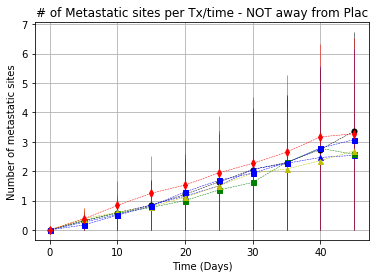

In [10]:
plt.errorbar(munging_metastic.index, munging_metastic["Ketapril"], 
             yerr=munging_se_metastic["Ketapril"], color="k", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Naftisol"], 
             yerr=munging_se_metastic["Naftisol"], color="b", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Propriva"], 
             yerr=munging_se_metastic["Propriva"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Ceftamin"], 
             yerr=munging_se_metastic["Ceftamin"], color="y", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Zoniferol"], 
             yerr=munging_se_metastic["Zoniferol"], color="b", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_metastic.index, munging_metastic["Placebo"], 
             yerr=munging_se_metastic["Placebo"], color="r", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("# of Metastatic sites per Tx/time - NOT away from Plac")
plt.ylabel("Number of metastatic sites")
plt.xlabel("Time (Days)")
plt.grid(True)

plt.savefig("task2_2.png")
plt.show()

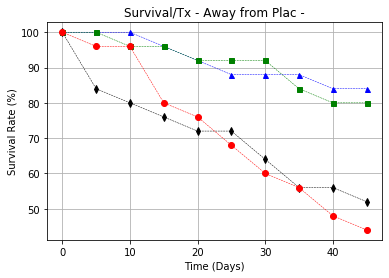

In [11]:
mice = agrup_drug_time["Mouse ID"].count()

mice_by_drug_time_df = pd.DataFrame({"Mouse Count" : mice})
mice_by_drug_time_df = mice_by_drug_time_df.reset_index()
mice_by_drug_time_df = mice_by_drug_time_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

plt.plot(100 * mice_by_drug_time_df["Capomulin"] / 25, "b^", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Ramicane"] / 25, "gs", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Ceftamin"] / 25, "kd", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Placebo"] / 25 , "ro", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival/Tx - Away from Plac -")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)

plt.savefig("Fig3_1.png")
plt.show()

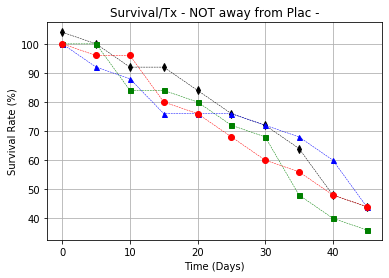

In [12]:
plt.plot(100 * mice_by_drug_time_df["Stelasyn"] / 25, "kd", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Infubinol"] / 25, "gs", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Ketapril"] / 25, "b^", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Placebo"] / 25 , "ro", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival/Tx - NOT away from Plac -")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)


plt.savefig("Fig3_2.png")
plt.show()

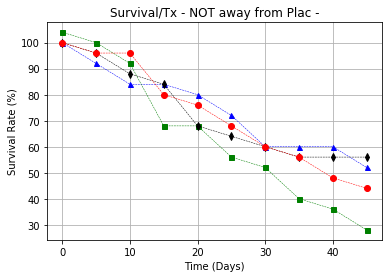

In [13]:
plt.plot(100 * mice_by_drug_time_df["Naftisol"] / 25, "b^", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Propriva"] / 25, "gs", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Zoniferol"] / 25, "kd", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_by_drug_time_df["Placebo"] / 25 , "ro", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival/Tx - NOT away from Plac -")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)


plt.savefig("Fig3_3.png")
plt.show()

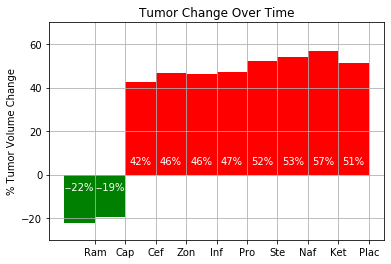

In [15]:
tumor_change =  100 * (munging_mean_tumor.iloc[-1] - munging_mean_tumor.iloc[0]) / munging_mean_tumor.iloc[0]
tumor_change_sem =  100 * (munging_se_mean_tumor.iloc[-1] - munging_se_mean_tumor.iloc[0]) / munging_se_mean_tumor.iloc[0]

changes = (tumor_change["Ramicane"], tumor_change["Capomulin"], tumor_change["Ceftamin"], 
               tumor_change["Zoniferol"], tumor_change["Infubinol"], tumor_change["Propriva"],
               tumor_change["Stelasyn"], tumor_change["Naftisol"], tumor_change["Ketapril"], 
               tumor_change["Placebo"])

fig, ax = plt.subplots()
ind = np.arange(len(changes))  
width = 1
rpass = ax.bar(ind[0], changes[0], width, color="green")
alsopass = ax.bar(ind[1], changes[1], width, color="green")
fail = ax.bar(ind[2:], changes[2:], width, color="red")


ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over Time")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Ram", "Cap", "Cef", "Zon", "Inf", "Pro", "Ste", "Naf", "Ket", "Plac"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)


def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 4,
                '%d%%' % int(height), ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%%' % int(height), ha='center', va='bottom', color="white")

def autolabelPassalso(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%%' % int(height), ha='center', va='bottom', color="white")
        

autolabelPass(rpass)
autolabelPassalso(alsopass)
autolabelFail(fail)


fig.savefig("Fig4.png")
fig.show()